# Laborator 10: Filtre FIR trece bandă și trece-sus

## Introducere in Python si Numpy [2p]

În acest laborator vom avea în vedere 2 aspecte. Vom încerca să ne familiarizăm cu un nou limbaj de programare - Python și în același timp vom învăța câteva concepte noi de procesarea semnalelor.

De ce să învățăm încă un limbaj de programare? 
* Python este un limbaj care a devenit foarte popular în ultimii ani și oferă numeroase biblioteci și framework-uri utile procesării semnalelor. 
* Spre deosebire de Matlab este free, iar spre deosebire de Octave are un ecosistem de biblioteci mai bine întreținut.


În acest laborator nu ne vom concentra pe învățarea limbajului, doar vom arăta câteva exemple pentru a îl avea în vedere în viitor.


În acest laborator ne vom folosi de Google Colab, care ne oferă un notebook Python în care putem rula cod fără a ne mai preocupa de setup. Foarte important este și faptul că în acest mediu avem access la GPU din cloud.

Pentru a rula o secvență de cod, precum următoarea trebuie să apăsăm în dreptul parantezelor pătrate din dreptul codului  [ ]. 

In [1]:
a = 1

Rulați căsuța de mai jos de mai multe ori.

In [2]:
a = a + 1
print(a)

2


Tot ce rulăm într-un notebook va rămâne în memorie pană când vom curăța explicit (la fel ca în terminalul octave / Matlab). Resetăm notebook-ul din *Runtime / Restart runtime*.

Pentru procesarea semnalelor ne vom folosi de biblioteca *numpy*. Aceasta ne va ajuta să aplicăm o mulțime de operații matematice vectoriale, precum suntem obișnuiți din Octave. Putem defini elementele pe care le folosim cel mai des precum vectorii și matricele folosindu-ne de numpy.

In [3]:
# limbajul Python poate defini liste precum
a = [1,2,3,4,5]
print(a)

#Acestea sunt generale și pot contine diverse tipuri de date
a = [1, 'a', 3.14]
print(a)

import numpy
# Pentru a beneficia de performanță și de operațiile matematice din $numpy$, vom încerca să folosim mereu numpy arrays
v = numpy.array([1,2,3,4,5])
print(v)

[1, 2, 3, 4, 5]
[1, 'a', 3.14]
[1 2 3 4 5]


In [4]:
import numpy as np # se obisnuieste sa se prescurteze denumirea
# putem defini o matrice ca numpy array
M = np.array([[1,2,3],[4,5,6]])

In [5]:
print(f'Afișăm un vector')
print(v)
print(f'Afișăm o matrice')
print(M)

Afișăm un vector
[1 2 3 4 5]
Afișăm o matrice
[[1 2 3]
 [4 5 6]]


Putem să definim array-uri de orice dimensiune cu functiile *numpy.ones* sau *numpy.zeros*

In [6]:
x = np.ones((1,10)) # vector de dimensiune 1x10

# pentru a afla dimensiunea unui array folosim functia shape
print(x.shape)
print(np.shape(x))

y = np.zeros((10)) # echivalent cu un vector de dimensiune 1x10
print(y.shape)

z = 2 * x + 3 * y
print(z)


(1, 10)
(1, 10)
(10,)
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]


In [7]:
M = np.ones((10,10)) # matrice de dimensiune 10x10
print(M)
print(M.shape)



[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
(10, 10)


Mai sus am înmulțit un scalar cu un vector: `2 * x`. Să încercăm să înmulțim element cu element 2 vectori de aceeasi mărime: x și z. 



In [8]:
q = x * z
print(q)

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]



In mod default operatorul `*` va face înmulțire element cu element (similar cu `.*` din octave ). 

*Atenție*: Dacă vrem să folosim operația de înmulțire de matrici *nu* trebuie sa folosim operatorul `*`.


In [9]:
M1 = np.ones((4,4))
M2 = np.ones((4,4))

elemnt_wise_M = M1 * M2
print(elemnt_wise_M)


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Pentru înmulțire de matrici trebuie să folosim funcția `numpy.matmul`.

In [10]:
matrix_mult_M = np.matmul(M1,M2)
print(matrix_mult_M)

[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]


In [11]:
a = np.arange(10) 
print(a) # [0 1 2 3 4 5 6 7 8 9]

# putem selecta o parte dintr-un array folosindu-ne de 'slice':  array[stanga:dreapta]
b = a[2:5] # [2 3 4]
print(b)

# putem lasa liber unul din capete. 
# [:dreapta] selecteaza toate elementele pana la capatul din dreapta
# [stanga:] selecteaza toate elementele incepand din capatul din stanga pana la sfarsit

print(a[:2]) # [0 1]
print(a[5:]) # [5 6 7 8 9]

# putem selecta elemente sarind elemente. [stanga:dreapta:pas]
print(a[1:8:2]) # [1 3 5 7]
print(a[::2]) # de la inceput pana la sfarsit cu pasul 2: [0 2 4 6 8]



[0 1 2 3 4 5 6 7 8 9]
[2 3 4]
[0 1]
[5 6 7 8 9]
[1 3 5 7]
[0 2 4 6 8]


In numpy se foloseste convenția de row-major, deci este indicat să se parcurgă întâi dimensiunea cea mai din dreapta (în cazul matricelor, dimensiunea rândurilor). De asemenea, mereu când este posibil, este indicat să se folosească operații vectoriale.

In [12]:
import time

N = 1000
A = np.random.rand(N,N)
B = np.random.rand(N,N)
C = np.zeros((N,N))

time1 = time.time()
for i in range(N):
  for j in range(N):
    C[i,j] = A[i,j] * B[i,j]

time_row = time.time() - time1


time2 = time.time()
for j in range(N):
  for i in range(N):
        C[i,j] = A[i,j] * B[i,j]
time_column = time.time() - time2

time3 = time.time()
C = A * B;
time_matrix_operation = time.time() - time3

print(f'Timp row-major: {time_row} s')
print(f'Timp column-major: {time_column} s')
print(f'Timp matrix operation: {time_matrix_operation} s')

Timp row-major: 0.8836889266967773 s
Timp column-major: 0.9171981811523438 s
Timp matrix operation: 0.007003068923950195 s


## Exercițiul 1. [8p]

Pentru acest exercițiu vom utiliza metoda proiectării cu fereastră pentru a crea filtre FIR trece-bandă și trece-sus. Precum am văzut la curs, putem folosi același principiu pentru a crea filtre trece-jos, trece-bandă sau trece-sus. Tot ce trebuie să facem este să înmulțim coeficienții filtrelor (adică secvența $h_{ideal}$) cu valorile unei sinusoide de o anumită frecvență (centrul frecvențelor pentru filtrul trece-bandă).

Pentru a crea un filtru trece-bandă cu frecvența centrală $f_B$ ar trebui să procedați în felul următor:
  - Generați filtrul în timp $h_{ideal}$ precum în laboratorul 9 (creați filtrul în frecvență, treceți în domeniul timp, înmulțiți cu o fereastră precum Blackman sau alta)
  - Înmulțiți $h_{ideal}$ element cu element cu secvența $\cos(\frac{2\pi f_B n}{f_s})$, unde  $f_B$ este frecvența din centrul benzii dorite, iar $f_s$ este frecvența de eșantionare.


Câteva cazuri particulare:
  - $f_B = \frac{f_s}{4}$, în acest caz secvența cosinus devine [0, -1, 0, 1, 0, -1, 0, ...]. Acesta este un tip de filtru eficient trece-bandă centrat în frecvența $f_s / 4$.
  - $f_B = \frac{f_s}{2}$, în acest caz secvența cosinus devine [1, -1, 1, -1, ...] și obținem un filtru trece-sus. 

Acum că știți toate acestea (sperăm că ați reținut și de la curs), aveți de făcut următoarele:
  - Generați o secvență de filtru ideal trece-jos $H_{ideal}$ având N = 256 elemente, reprezentând spectrul de frecvență al unui filtru trece-jos. Folosiți o frecvență de cut-off de fs/16. Adică totul înainte de fs/16 trebuie să treacă, pe când totul mai sus trebuie sa fie oprit (folosiți un dreptunghi care se oprește la fs/16). Observați că trebuie să generați un spectru simetric pentru a obține o secvență reală la următorul pas.
  - Acum aplicați inversa DFT(în practică inversa FFT) pentru a obține secvența corespunzătoare în domeniul timp $h_{ideal}$.
  - Trunchiați secvența $h_{ideal}$ prin selectarea a doar L=65 de eșantioane din centru(32 din stânga maximului funcției sinc, maximul funcției, și 32 de eșantioane din dreapta). Aceasta corespunde multiplicării secvenței  $h_{ideal}$ cu o fereastră rectangulară centrată în punctul maxim al funcției sinc. Plotați secvența.
  - Aplicați DFT($fft$) pe secvența trunchiată înmulțită cu fereastra rectangulară (care conține doar 1) și plotați spectrul. Rețineți: este important aici, precum și la primul plot pentru filtru trece-jos ideal, să notăm axa frecvențelor (axa x) ca o funcție de Fs, adică de la 0 la 1.
  - Folosiți aceeași secvență trunchiată ca mai sus, dar înmulțiți-o cu o fereastră precum $Blackman$. Aplicați din nou $fft$ și plotați spectrul.
  - Din această secvență puteți obține o secvență corespunzătoare unui filtru trece-bandă cu $f_B = \frac{f_s}{4}$.
  - Obțineți o secvență corespunzătoare unui filtru trece-sus cu $f_B = \frac{f_s}{2}$.
  - Generați trei sinusoide cu frecvențe diferite (ex: $0.1 \cdot f_s$, $0.25 \cdot f_s$, $0.4 \cdot f_s$, unde $f_s = 64000$ și $N = 64$) și filtrați-le (folosind funcția *numpy.convolve*) cu  filtrele trece-sus și trece-bandă obținute mai sus. Plotați atât input-ul cât și output-ul în același plot folosind *numpy.stem* pentru a observa efectele filtrelor.


In [13]:
# Generam un filtru trece-jos ideal in domeniul frecvență
N = 256
kc = N // 16
H_ideal = np.zeros(N)

H_ideal[:kc] = 1
H_ideal[-kc+2:] = 1

fx = np.linspace(0,1,N)

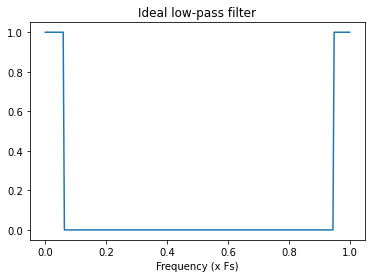

In [14]:
# pentru a realiza ploturi în Python vom folosi biblioteca matplotlib
import matplotlib.pyplot as plt
plt.plot(fx,H_ideal)
plt.xlabel('Frequency (x Fs)');
plt.title('Ideal low-pass filter');

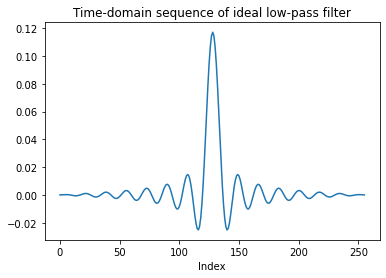

In [15]:
from numpy.fft import fft, ifft, fftshift, ifftshift
# Obținem filtrul în domeniul timp prin aplicarea inversa transformatei fourier 
h_ideal = ifftshift(ifft(H_ideal))
h_ideal = np.real(h_ideal)

plt.plot(h_ideal);
plt.xlabel('Index');
plt.title('Time-domain sequence of ideal low-pass filter');

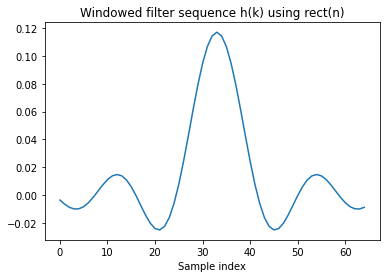

In [16]:
# Generate windowed time-domain sequence
# window = rectangle
L = 65
w = np.ones(L)
b = int(N / 2 - L / 2)
e = int(N / 2 + L / 2)
h_rectangle = h_ideal[b:e] * w

plt.plot(h_rectangle);
plt.xlabel('Sample index');
plt.title('Windowed filter sequence h(k) using rect(n)');

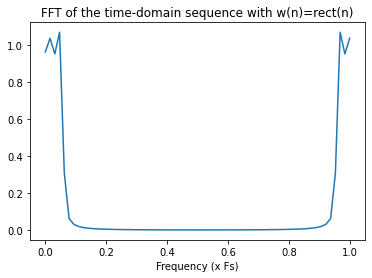

In [17]:
# Obtain frequency-domain of windowed sequence
H_rectangle = fft(h_rectangle);
fx = np.linspace(0,1,L);
plt.plot(fx, np.abs(H_rectangle));
plt.xlabel('Frequency (x Fs)');
plt.title('FFT of the time-domain sequence with w(n)=rect(n)');


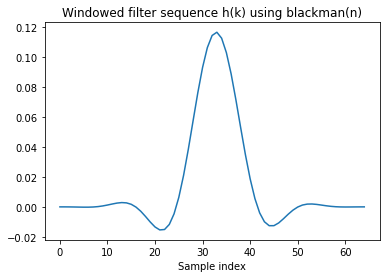

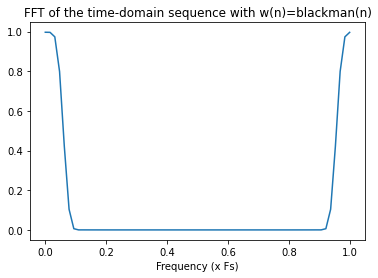

In [18]:
# Generate windowed time-domain sequence
# window = blackman
L = 65;
w = np.blackman(L)

b = int(N / 2 - L / 2)
e = int(N / 2 + L / 2)
h_lowpass = h_ideal[b:e] * w

plt.plot(h_lowpass);
plt.xlabel('Sample index');
plt.title('Windowed filter sequence h(k) using blackman(n)');

#  Obtain frequency-domain of windowed sequence
H_lowpass = fft(h_lowpass);
fx = np.linspace(0,1,L);

plt.figure()
plt.plot(fx, np.abs(H_lowpass));
plt.xlabel('Frequency (x Fs)');
plt.title('FFT of the time-domain sequence with w(n)=blackman(n)');

Până acum am creat un filtru trece-jos în domeniul timp. Să ne definim un semnal de intrare de tip sinusoidal și să îl filtrăm cu acest filtru trece-jos. Semnalul de intrare va avea $E = 64$ de eșantioane și va corespunde unui semnal de frecvență $f = 3000$ Hz eșantionat la o frecvență de $f_s = 64000$ Hz.



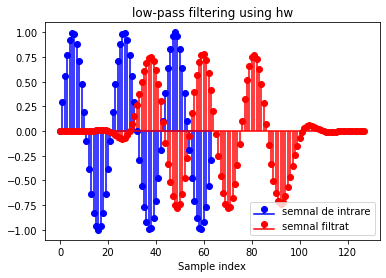

In [19]:
#  Filter a sinewave using the low-pass filter
fs = 64000
E = 64
x = np.arange(E)
f = 3000
A = 1
xn = np.zeros(64)
for i in range(0,64):
    xn[i] = A * np.sin(2 * np.pi * f * i/fs)
# # filtram semnalul xn cu filtrul h_lowpass
yn = numpy.convolve(xn, h_lowpass)


plt.stem(x, xn, 'b','bo','b', label='semnal de intrare');
plt.stem(np.arange(128), yn,'r','ro','r',label='semnal filtrat');
plt.xlabel('Sample index');
plt.legend()
plt.title('low-pass filtering using hw');

In pasul următor trebuie să obținem un filtru trece-bandă din filtrul trece-jos pe care deja îl avem. Precum am spus mai sus obținem un filtru trece-bandă dacă înmulțim element cu element filtrul trece-jos în domeniul timp cu un semnal cosinus: $\cos(\frac{2\pi f_B n}{f_s})$ de frecvență $f_B$. 
Folosim cazul particular $f_B = \frac{f_s} {4}$.


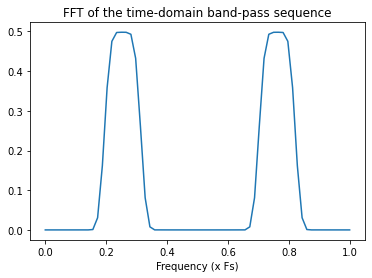

In [20]:
# Obtinem un filtru trece-banda dintr-un filtru trece-jos  
# Inmultim filtrul trece-jos cu: cos(pi/2 * n) = [0, -1, 0, 1, 0, -1, ...]

h_bandpass = np.copy(h_lowpass);
f = np.ones(E + 1)

for i in range(E+1):
    f[i]=np.cos(np.pi*i/2)


for i in range(E+1):

    h_bandpass[i]=h_lowpass[i]*f[i]
# Trecem filtrul in domeniul frecventa
H_bandpass = fft(h_bandpass)

# Afisam filtrul in domeniul frecventa
fx = np.linspace(0,1,L);
plt.plot(fx, abs(H_bandpass));
plt.xlabel('Frequency (x Fs)');
plt.title('FFT of the time-domain band-pass sequence');

Pentru a verifica frecvențele atenuate de filtru, vom defini 3 frecvențe de intrare, le vom filtra pe fiecare cu filtrul trece-banda și vom vedea cum este afectat semnalul de intrare, în funcție de frecvență.

In [21]:
# Filtram sinusoidele de intrare folosind filtre trece-banda

# parametrii filtrelor
fs = 64000
N = 64
x = np.arange(N)
f1 = 3000
f2 = 15000
f3 = 30000
A = 1

xn1 = np.zeros(E)
for i in range(E): 
  xn1[i] = np.sin(2 * np.pi * f1 * (1/fs) * i)
xn2 = np.zeros(E)
for i in range(E): 
  xn2[i] = np.sin(2 * np.pi * f2 * (1/fs) * i)
xn3 = np.zeros(E)
for i in range(E): 
  xn3[i] = np.sin(2 * np.pi * f3 * (1/fs) * i)

# aplicam convolutie intre semnalele de intrare xn si filtrul hwb
yn1 =numpy.convolve(xn1, h_bandpass)
yn2 = numpy.convolve(xn2, h_bandpass)
yn3 =numpy.convolve(xn3, h_bandpass)

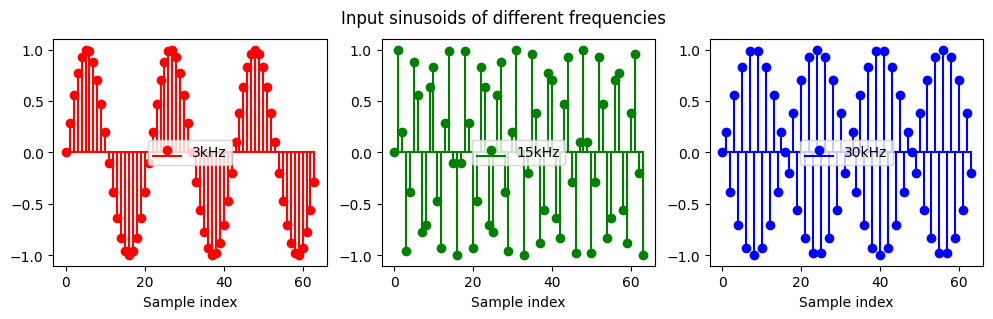

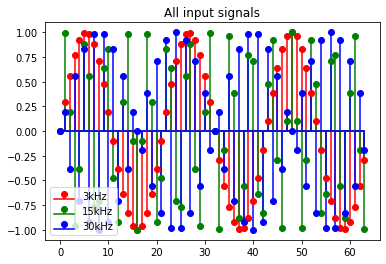

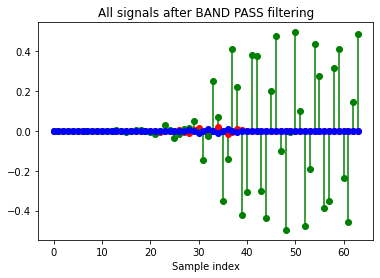

In [22]:
#@title Plotam semnalele filtrate

# plt.subplot(2,1,1);
fig=plt.figure(figsize=(12,3), dpi= 100, facecolor='w', edgecolor='k')

# pentru claritate afisam separat fiecare semnal de intrare
fig.suptitle('Input sinusoids of different frequencies');
plt.subplot(1,3,1);
plt.stem(x, xn1, 'r','ro','r',label='3kHz'); 
plt.xlabel('Sample index');
plt.legend()

plt.subplot(1,3,2);
plt.stem(x, xn2, 'g','go','g',label='15kHz');
plt.xlabel('Sample index');
plt.legend()

plt.subplot(1,3,3);
plt.stem(x, xn3, 'b','bo','b',label='30kHz');
plt.xlabel('Sample index');
plt.legend()


plt.figure()
plt.stem(x, xn1, 'r','ro','r',label='3kHz'); 
plt.stem(x, xn2, 'g','go','g',label='15kHz');
plt.stem(x, xn3, 'b','bo','b',label='30kHz');
plt.legend()
plt.title('All input signals')

plt.figure()
plt.stem(x, yn1[:N], 'r','ro','r',label='3 kHz');
#hold on;
plt.stem(x, yn2[:N], 'g','go','g',label='15 kHz');
plt.stem(x, yn3[:N], 'b','bo','b',label='30 kHz');
plt.xlabel('Sample index');
# plt.legend('yn 3kHz', 'yn 15kHz', 'yn 30kHz');
plt.title('All signals after BAND PASS filtering');

Similar ca mai sus, vom obține un filtru trece sus dacă înmulțim filtrul trece-jos cu un semnal cosinus de frecvență maxima, adică $f_B = \frac{f_s}{2}$. Adică $\cos(\frac{2\pi f_B n}{f_s})$ = $\cos(\frac{2\pi f_s n}{2 f_s}) = \cos \pi n$.

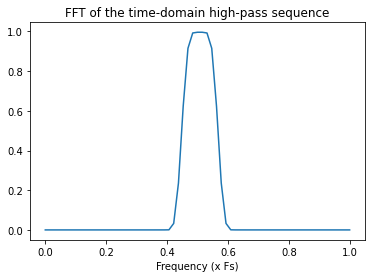

In [23]:
# Obtinem un filtru trece-sus dintr-un filtru trece-jos  
# Inmultim filtrul trece-jos cu: cos(pi * n) = [1, -1, 1, -1, ...]

h_highpass = np.copy(h_lowpass);

f = np.ones(E + 1)

for i in range(E+1):
    f[i]=np.cos(np.pi*i)


for i in range(E+1):

    h_highpass[i]=h_lowpass[i]*f[i]

# Trecem filtrul in domeniul frecventa
H_highpass = fft(h_highpass)

# Afisam filtrul in domeniul frecventa
fx = np.linspace(0,1,L);
plt.plot(fx, abs(H_highpass));
plt.xlabel('Frequency (x Fs)');
plt.title('FFT of the time-domain high-pass sequence');

In [24]:
# Filtram sinusoidele de intrare folosind filtre trece-sus

# parametrii filtrelor
fs = 64000
E = 64
x = np.arange(E)
f1 = 3000
f2 = 15000
f3 = 30000
A = 1

xn1 = np.zeros(E)
for i in range(E): 
  xn1[i] = np.sin(2 * np.pi * f1 * (1/fs) * i)
xn2 = np.zeros(E)
for i in range(E): 
  xn2[i] = np.sin(2 * np.pi * f2 * (1/fs) * i)
xn3 = np.zeros(E)
for i in range(E): 
  xn3[i] = np.sin(2 * np.pi * f3 * (1/fs) * i)

# aplicam convolutie intre semnalele de intrare xn si filtrul hwb
yn1 =numpy.convolve(xn1, h_highpass)
yn2 = numpy.convolve(xn2, h_highpass)
yn3 =numpy.convolve(xn3, h_highpass)

Plotam semnalele filtrate:

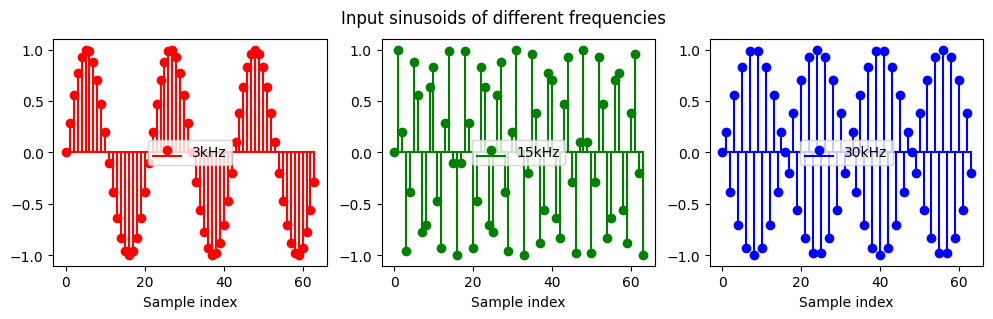

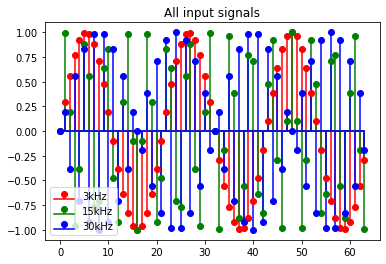

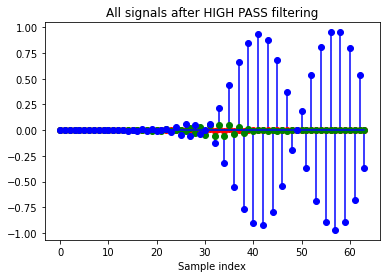

In [25]:
 
# plt.subplot(2,1,1);
fig=plt.figure(figsize=(12,3), dpi= 100, facecolor='w', edgecolor='k')

# pentru claritate afisam separat fiecare semnal de intrare
fig.suptitle('Input sinusoids of different frequencies');
plt.subplot(1,3,1);
plt.stem(x, xn1, 'r','ro','r',label='3kHz'); 
plt.xlabel('Sample index');
plt.legend()

plt.subplot(1,3,2);
plt.stem(x, xn2, 'g','go','g',label='15kHz');
plt.xlabel('Sample index');
plt.legend()

plt.subplot(1,3,3);
plt.stem(x, xn3, 'b','bo','b',label='30kHz');
plt.xlabel('Sample index');
plt.legend()


plt.figure()
plt.stem(x, xn1, 'r','ro','r',label='3kHz'); 
plt.stem(x, xn2, 'g','go','g',label='15kHz');
plt.stem(x, xn3, 'b','bo','b',label='30kHz');
plt.legend()
plt.title('All input signals')

plt.figure()
plt.stem(x, yn1[:N], 'r','ro','r',label='3 kHz');
#hold on;
plt.stem(x, yn2[:N], 'g','go','g',label='15 kHz');
plt.stem(x, yn3[:N], 'b','bo','b',label='30 kHz');
plt.xlabel('Sample index');
# plt.legend('yn 3kHz', 'yn 15kHz', 'yn 30kHz');
plt.title('All signals after HIGH PASS filtering');

## Exercițiul 2. [Bonus]

1. Încercați să implementați exercițiul 3 din laboratorul 9 în Python.
Pentru a afla coeficienții unui filtru FIR vă puteți folosi de funcția firwin din scipy.signal.

In [26]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(12,3), dpi= 100, facecolor='w', edgecolor='k')

fs = 64000;
N = 64;
b = 0 # folositi signal.firwin pentru a obtine coeficientii (b) ai unui filtru trece-jos:
      # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin
x1f = signal.lfilter(b, 1, x1) # x1 sinusoida de intrare, ex. f = 3 kHz

# Pentru a afișa răspunsul în frecvență puteți folosi funcția freqz:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html

NameError: name 'x1' is not defined

<Figure size 1200x300 with 0 Axes>

2. Pentru a proiecta un filtru IIR puteți folosi funcția butter din scipy.signal. La fel ca la subpunctul de mai sus, generați trei sinusoide și filtrați-le cu filtre de tip IIR.

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(12,3), dpi= 100, facecolor='w', edgecolor='k')

fs = 64000;
N = 64;
b, a = 0 # folositi signal.butter pentru a obtine coeficientii (b si a) ai unui filtru trece-jos:
      # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
x1f = signal.lfilter(b, a, x1) # x1 sinusoida de intrare, ex. f = 3 kHz

# Pentru a afișa răspunsul în frecvență puteți folosi funcția freqz:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html